In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


찾고 싶은 지역의 이름을 알려주세요 : 서울특별시


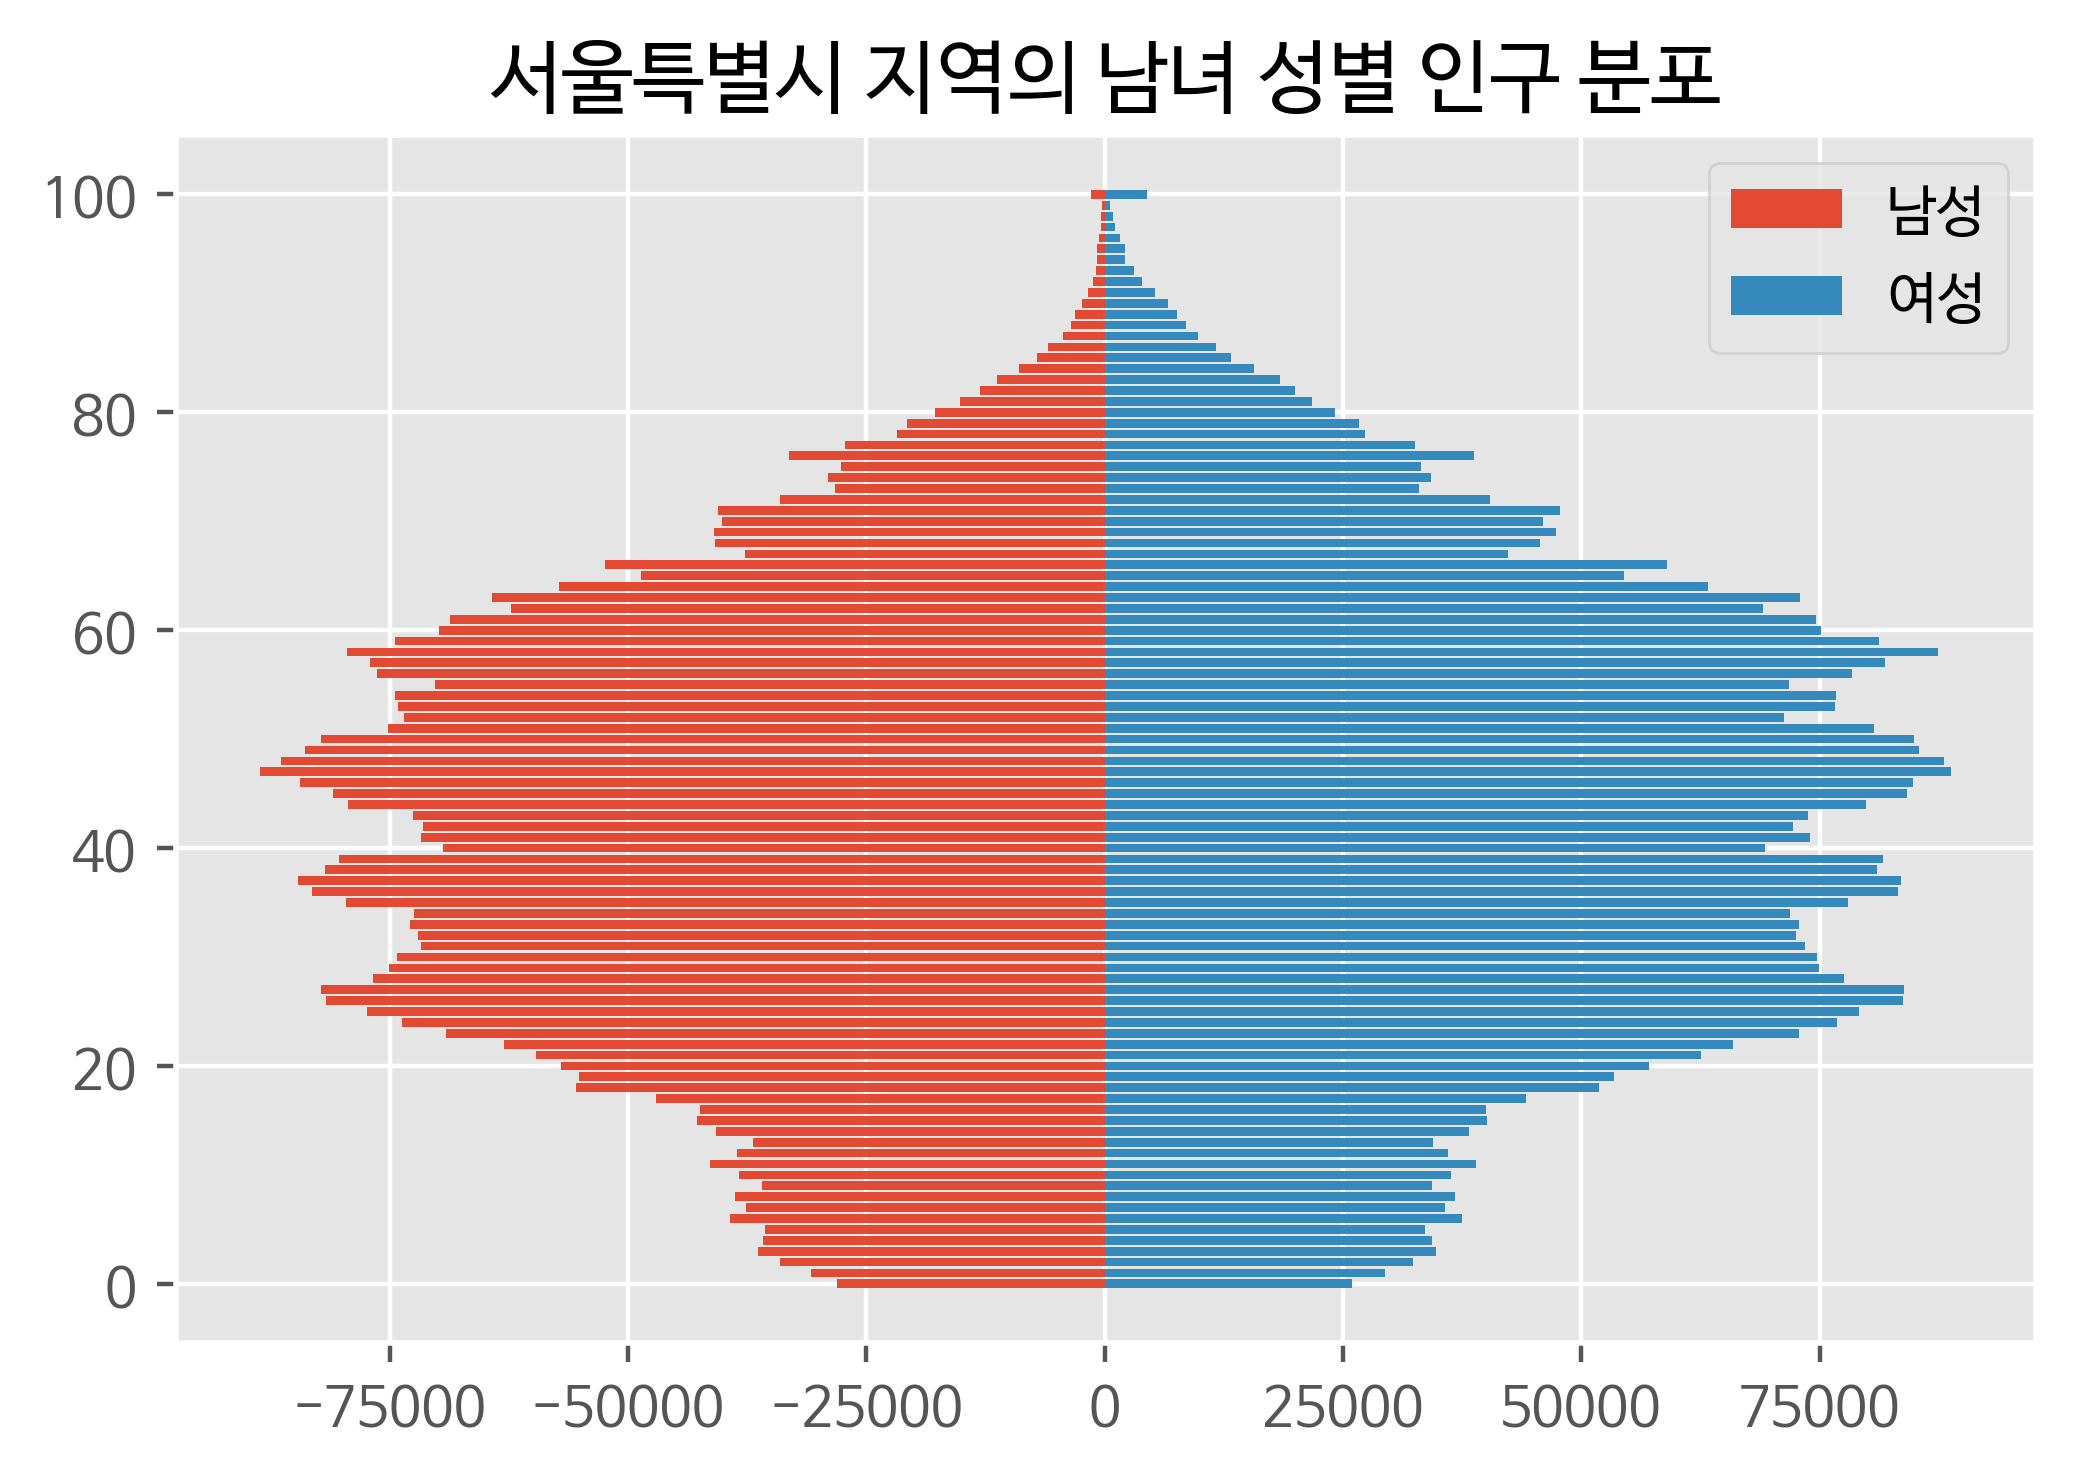

In [9]:
import csv

f = open('/content/age_gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)
male = []
female = []
name = input("찾고 싶은 지역의 이름을 알려주세요 : ")

for row in data:
  if name in row[0]:
    for i in range(0, 101):
      male.append(-int(row[i + 3].replace(",",""))) # 값들이 음수로 들어간다.
      female.append(int(row[-(i+1)].replace(",",""))) # -1 값부터 담는다. -> 100세 이상부터 값이 담긴다.
    break


female.reverse() 
# 0세부터 인구수 나올 수 있도록 데이터 뒤집기



# 시각화 설정
plt.figure(dpi = 200)
plt.rc('font', family = 'NanumBarunGothic')
plt.style.use('ggplot')
plt.title(f'{name} 지역의 남녀 성별 인구 분포')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.barh(range(101),male, label='남성')
plt.barh(range(101),female, label='여성')
plt.legend()
plt.show()

항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie


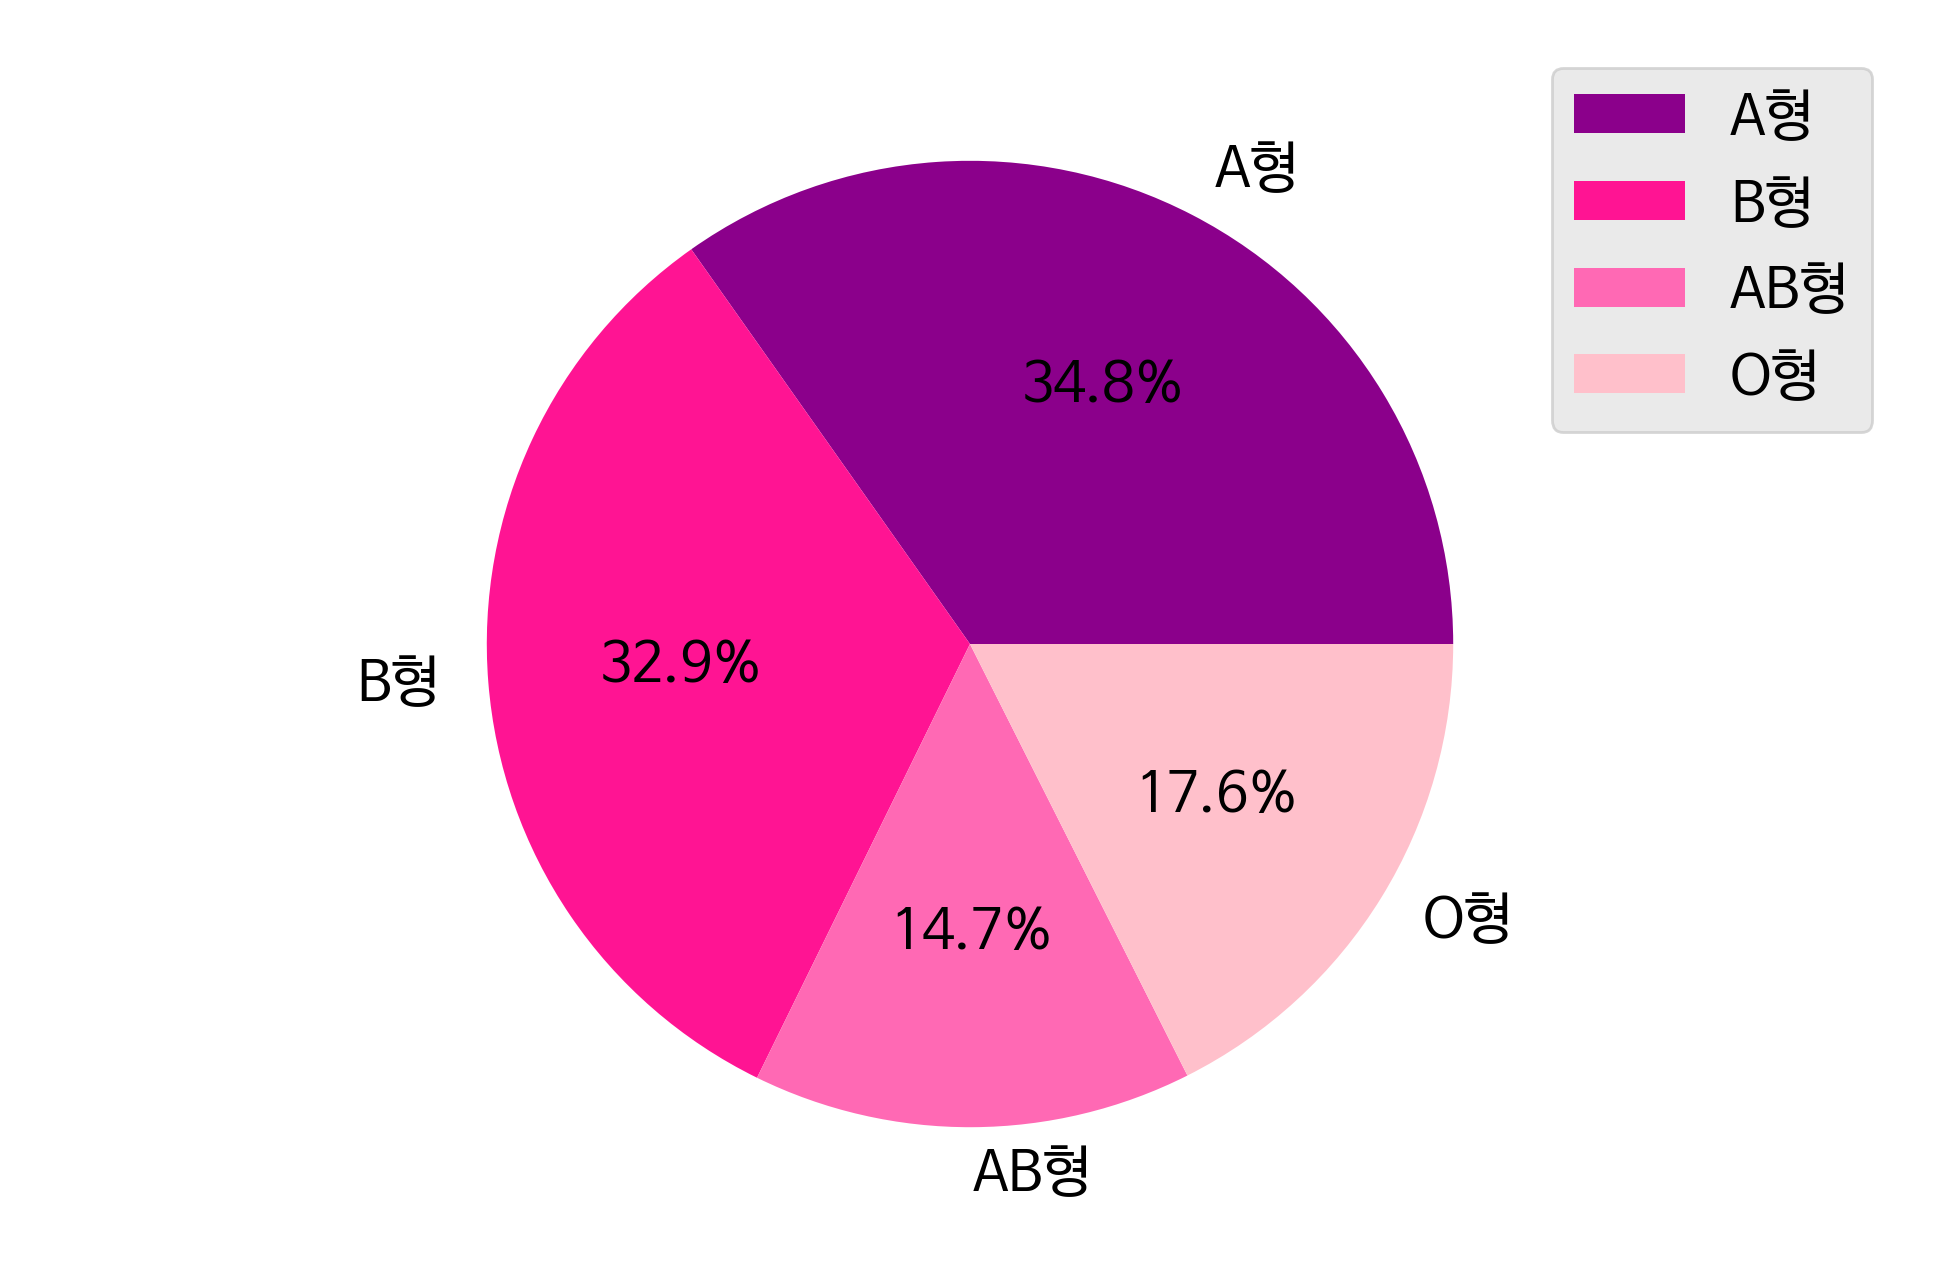

In [16]:
plt.figure(dpi = 200)
size = [2441,2312,1031,1233]
label = ["A형", "B형", "AB형", "O형"]
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis("equal")
plt.pie(size, labels=label, autopct="%.1f%%", colors=color)
plt.legend()
plt.show()

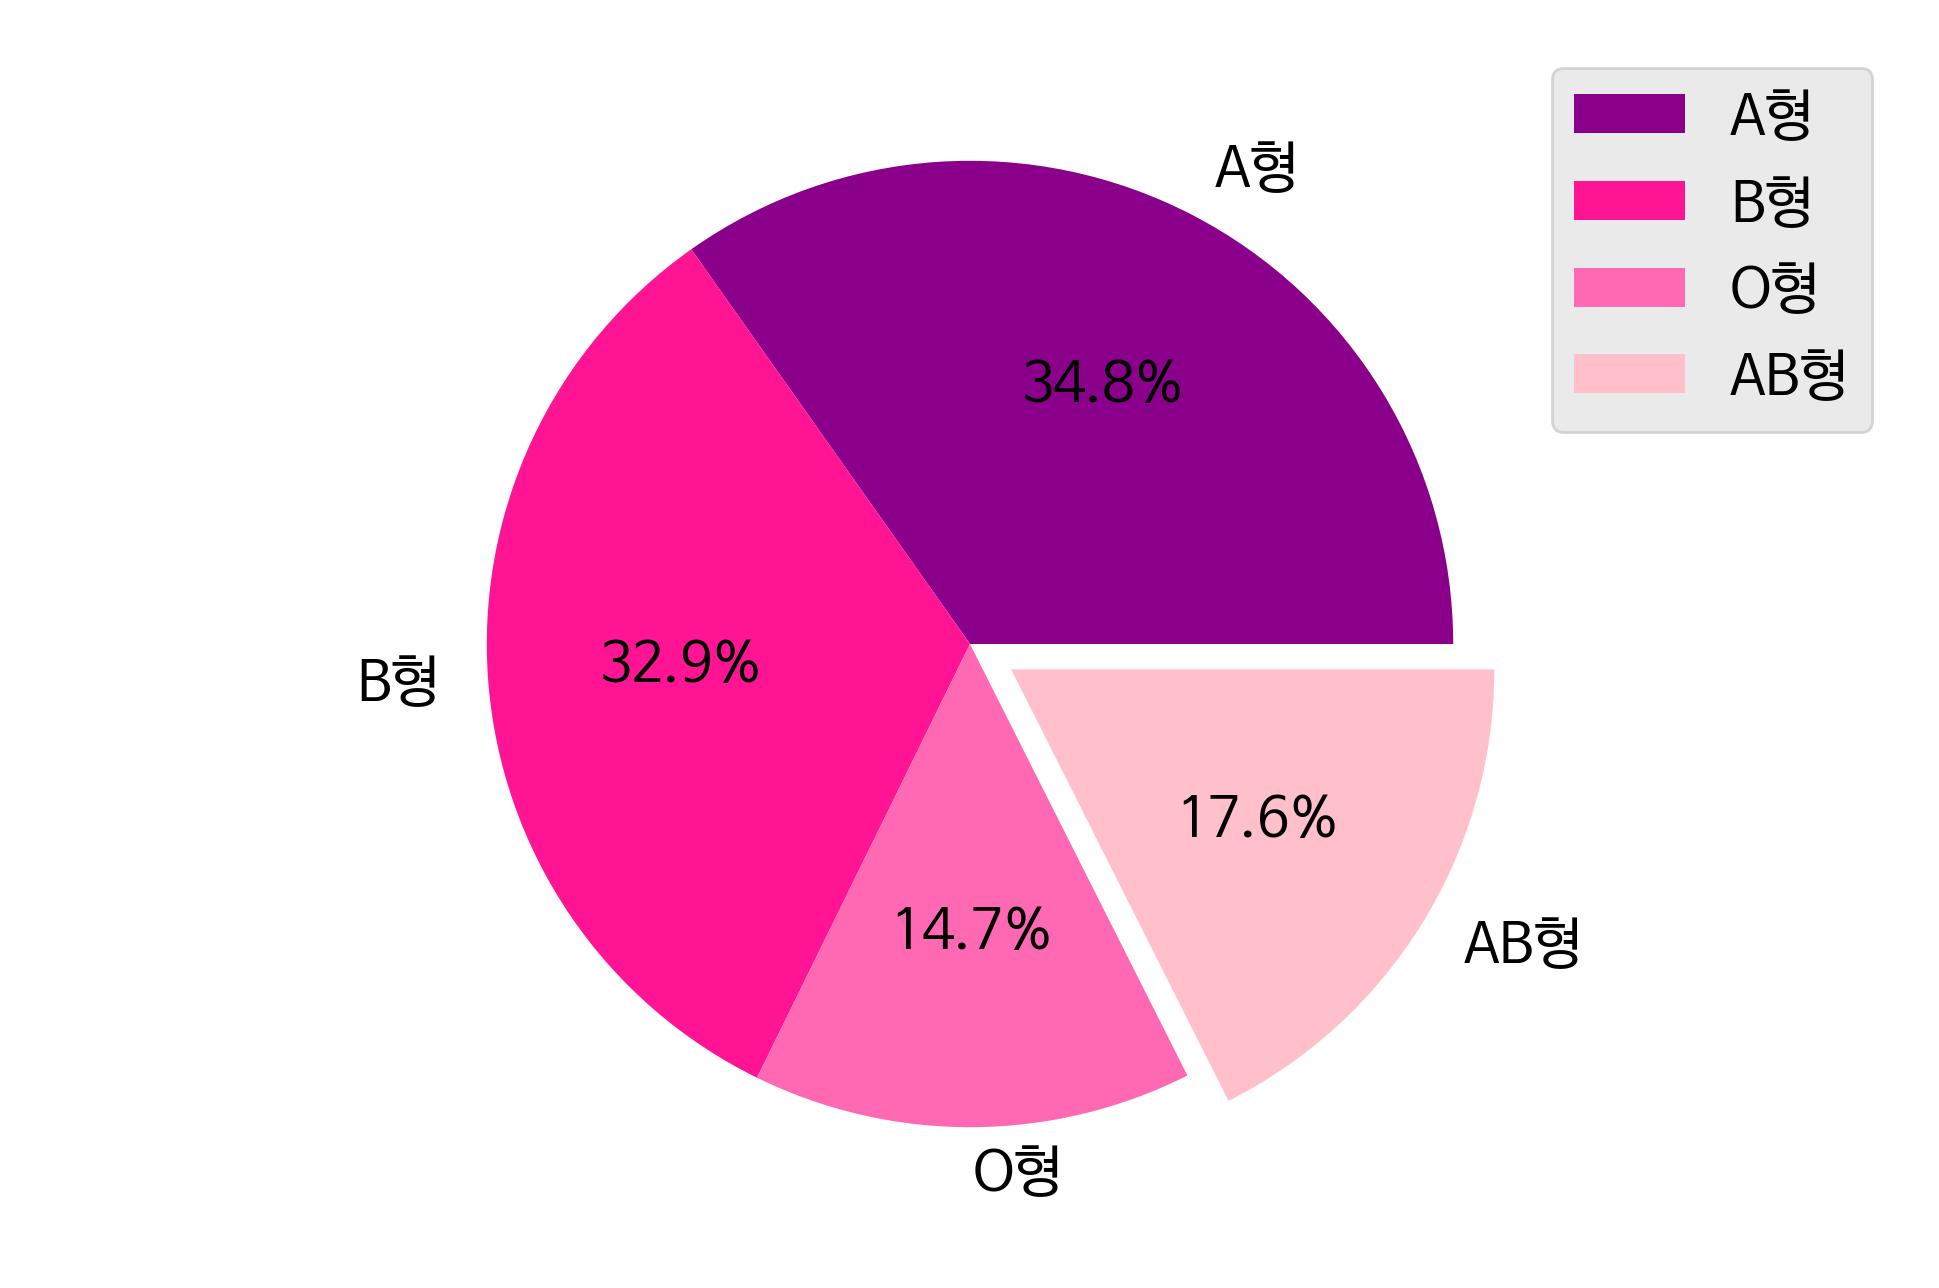

In [19]:
plt.figure(dpi = 200)
size = [2441,2312,1031,1233]
label = ["A형", "B형",  "O형", "AB형"]
##### matplot color 
##### https://matplotlib.org/gallery/color/named_colors.html

color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis("equal")
plt.pie(size, labels=label, autopct="%.1f%%", explode=(0,0,0,0.1), colors=color)
plt.legend()
plt.show()

찾고 싶은 지역의 이름을 알려주세요 : 제주특별자치도


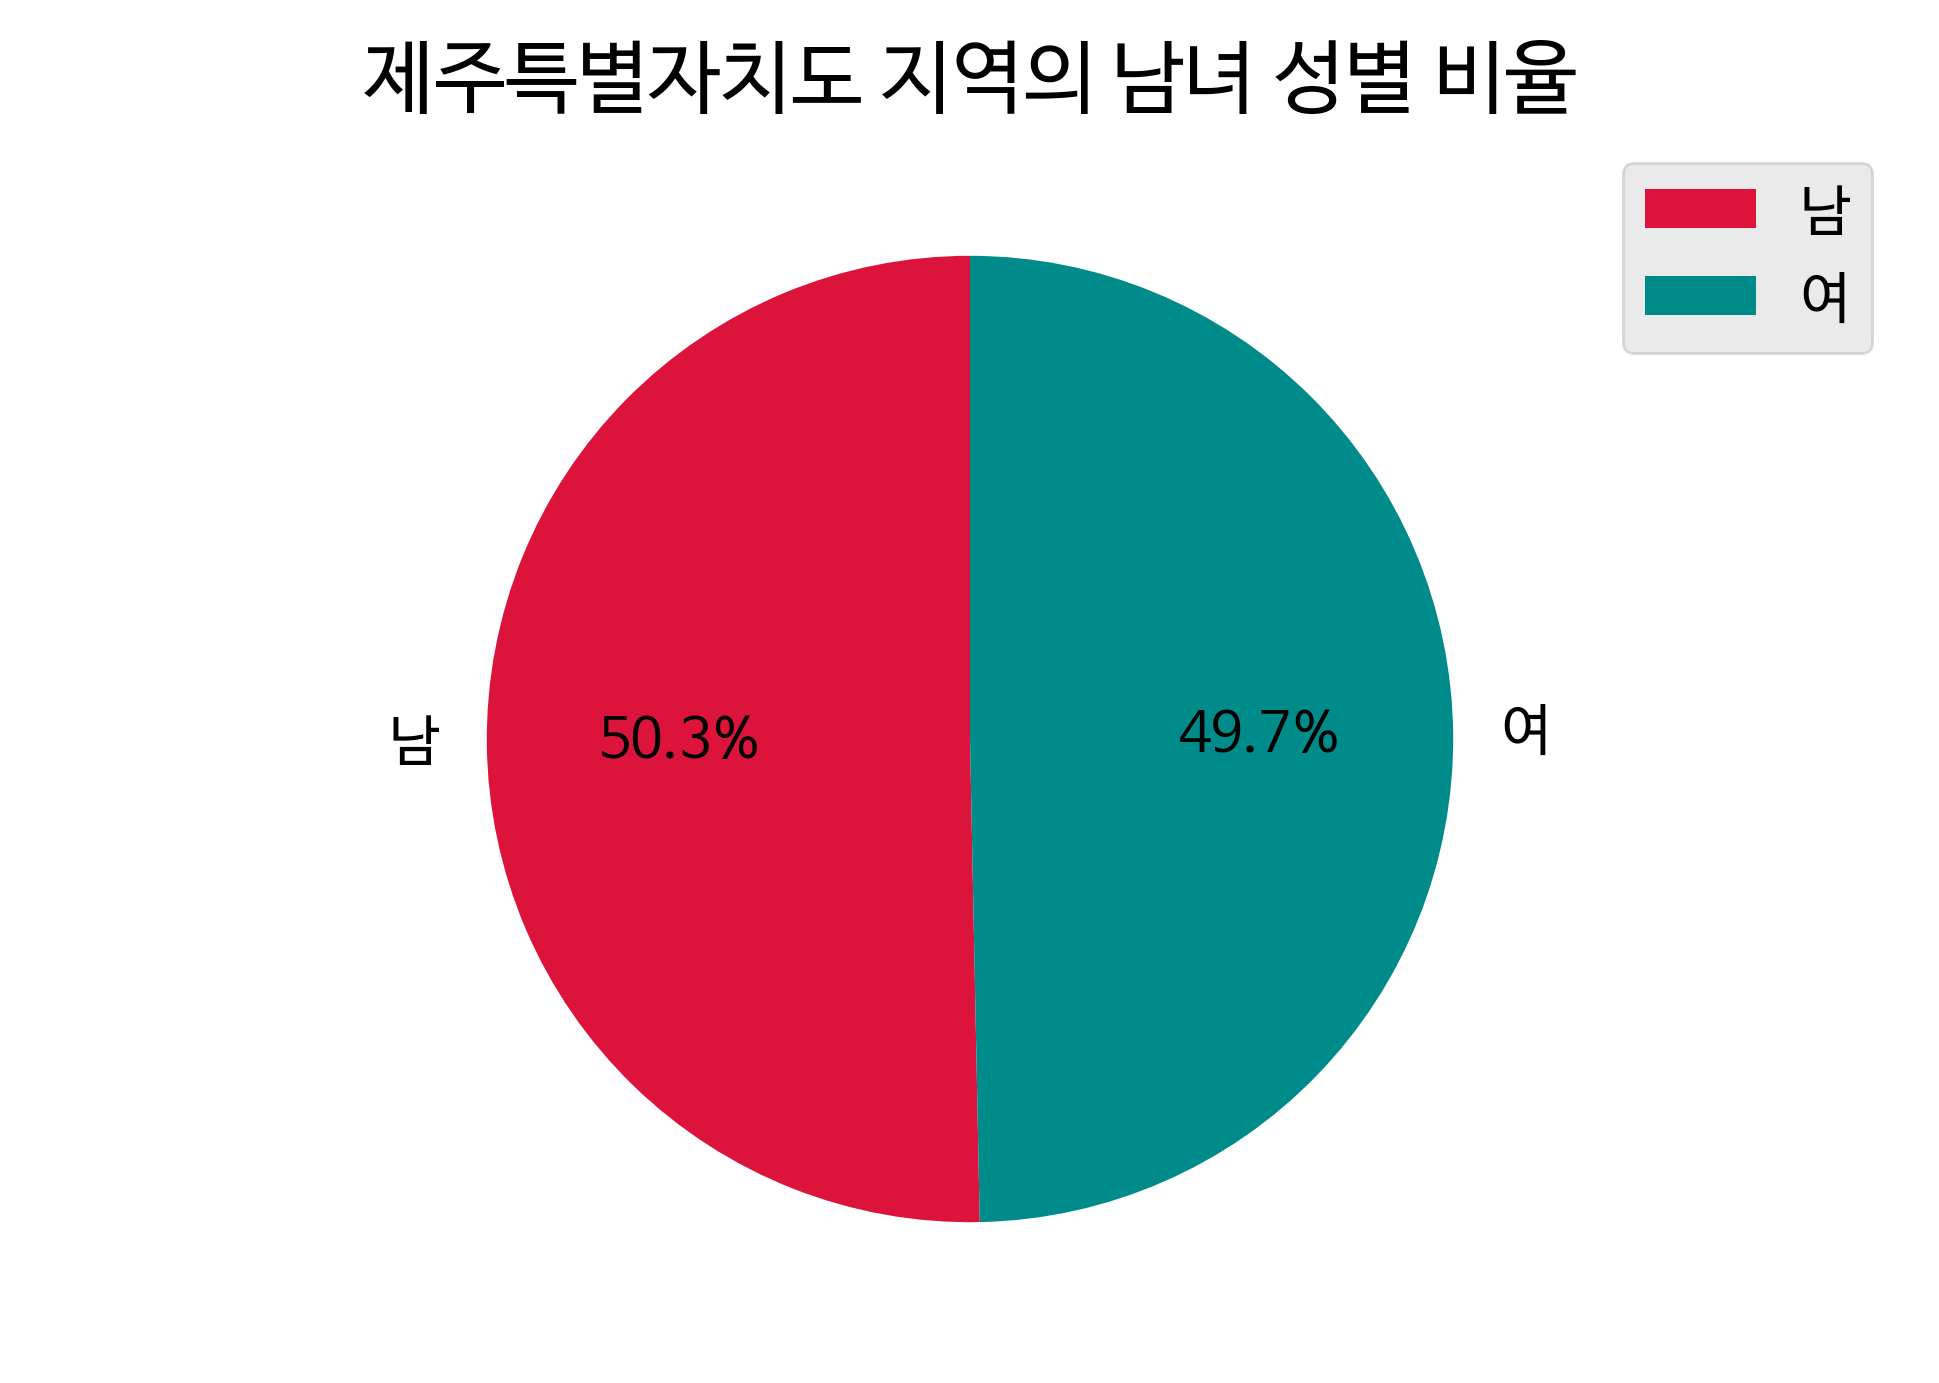

In [26]:
import csv

f = open('/content/age_gender.csv', 'r', encoding='cp949')
data = csv.reader(f)
header = next(data)

size = [] #제주도의 남성 인구 합계, 혀성 인구 합계

name = input("찾고 싶은 지역의 이름을 알려주세요 : ")

for row in data:
    if name in row[0]:
        m = 0
        f = 0
        for i in range(0, 101):
            m += int(row[i+3].replace(",",""))
            f += int(row[-(i+1)].replace(",",""))

        break
size.append(m)
size.append(f)

color = ['crimson', 'darkcyan']
label = ["남", "여"]
# 시각화 설정
plt.figure(dpi = 200)
plt.style.use("ggplot")
plt.axis("equal")
plt.pie(size, labels=label, autopct="%.1f%%", explode=(0,0), colors=color, startangle=90)
plt.legend()
plt.title(f"{name} 지역의 남녀 성별 비율")
plt.show()